In [1]:
import numpy as np
import tensorflow as tf
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [4]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

In [62]:
model = Sequential([
    Dense(70, activation='relu', input_shape=(784,)),
    Dense(50, activation='relu'),                      
    Dense(50, activation='softmax')                    
])

In [53]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
model.fit(x_train, y_train, epochs=30, validation_split=0.3)


Epoch 1/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9909 - val_loss: 0.1209
Epoch 2/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9986 - loss: 0.0076 - val_accuracy: 0.9919 - val_loss: 0.1083
Epoch 3/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9994 - loss: 0.0017 - val_accuracy: 0.9894 - val_loss: 0.1240
Epoch 4/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9983 - loss: 0.0052 - val_accuracy: 0.9916 - val_loss: 0.1069
Epoch 5/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9929 - val_loss: 0.0987
Epoch 6/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9999 - loss: 4.4235e-04 - val_accuracy: 0.9912 - val_loss: 0.1190
Epoch 7/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9972 - loss: 0.0145 - val_accuracy: 0.9918 - val_loss: 0.0990
Epoch 8/30
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9993 - loss: 0.002

In [61]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9754 - loss: 0.3902      
Test accuracy: 0.9790


In [58]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


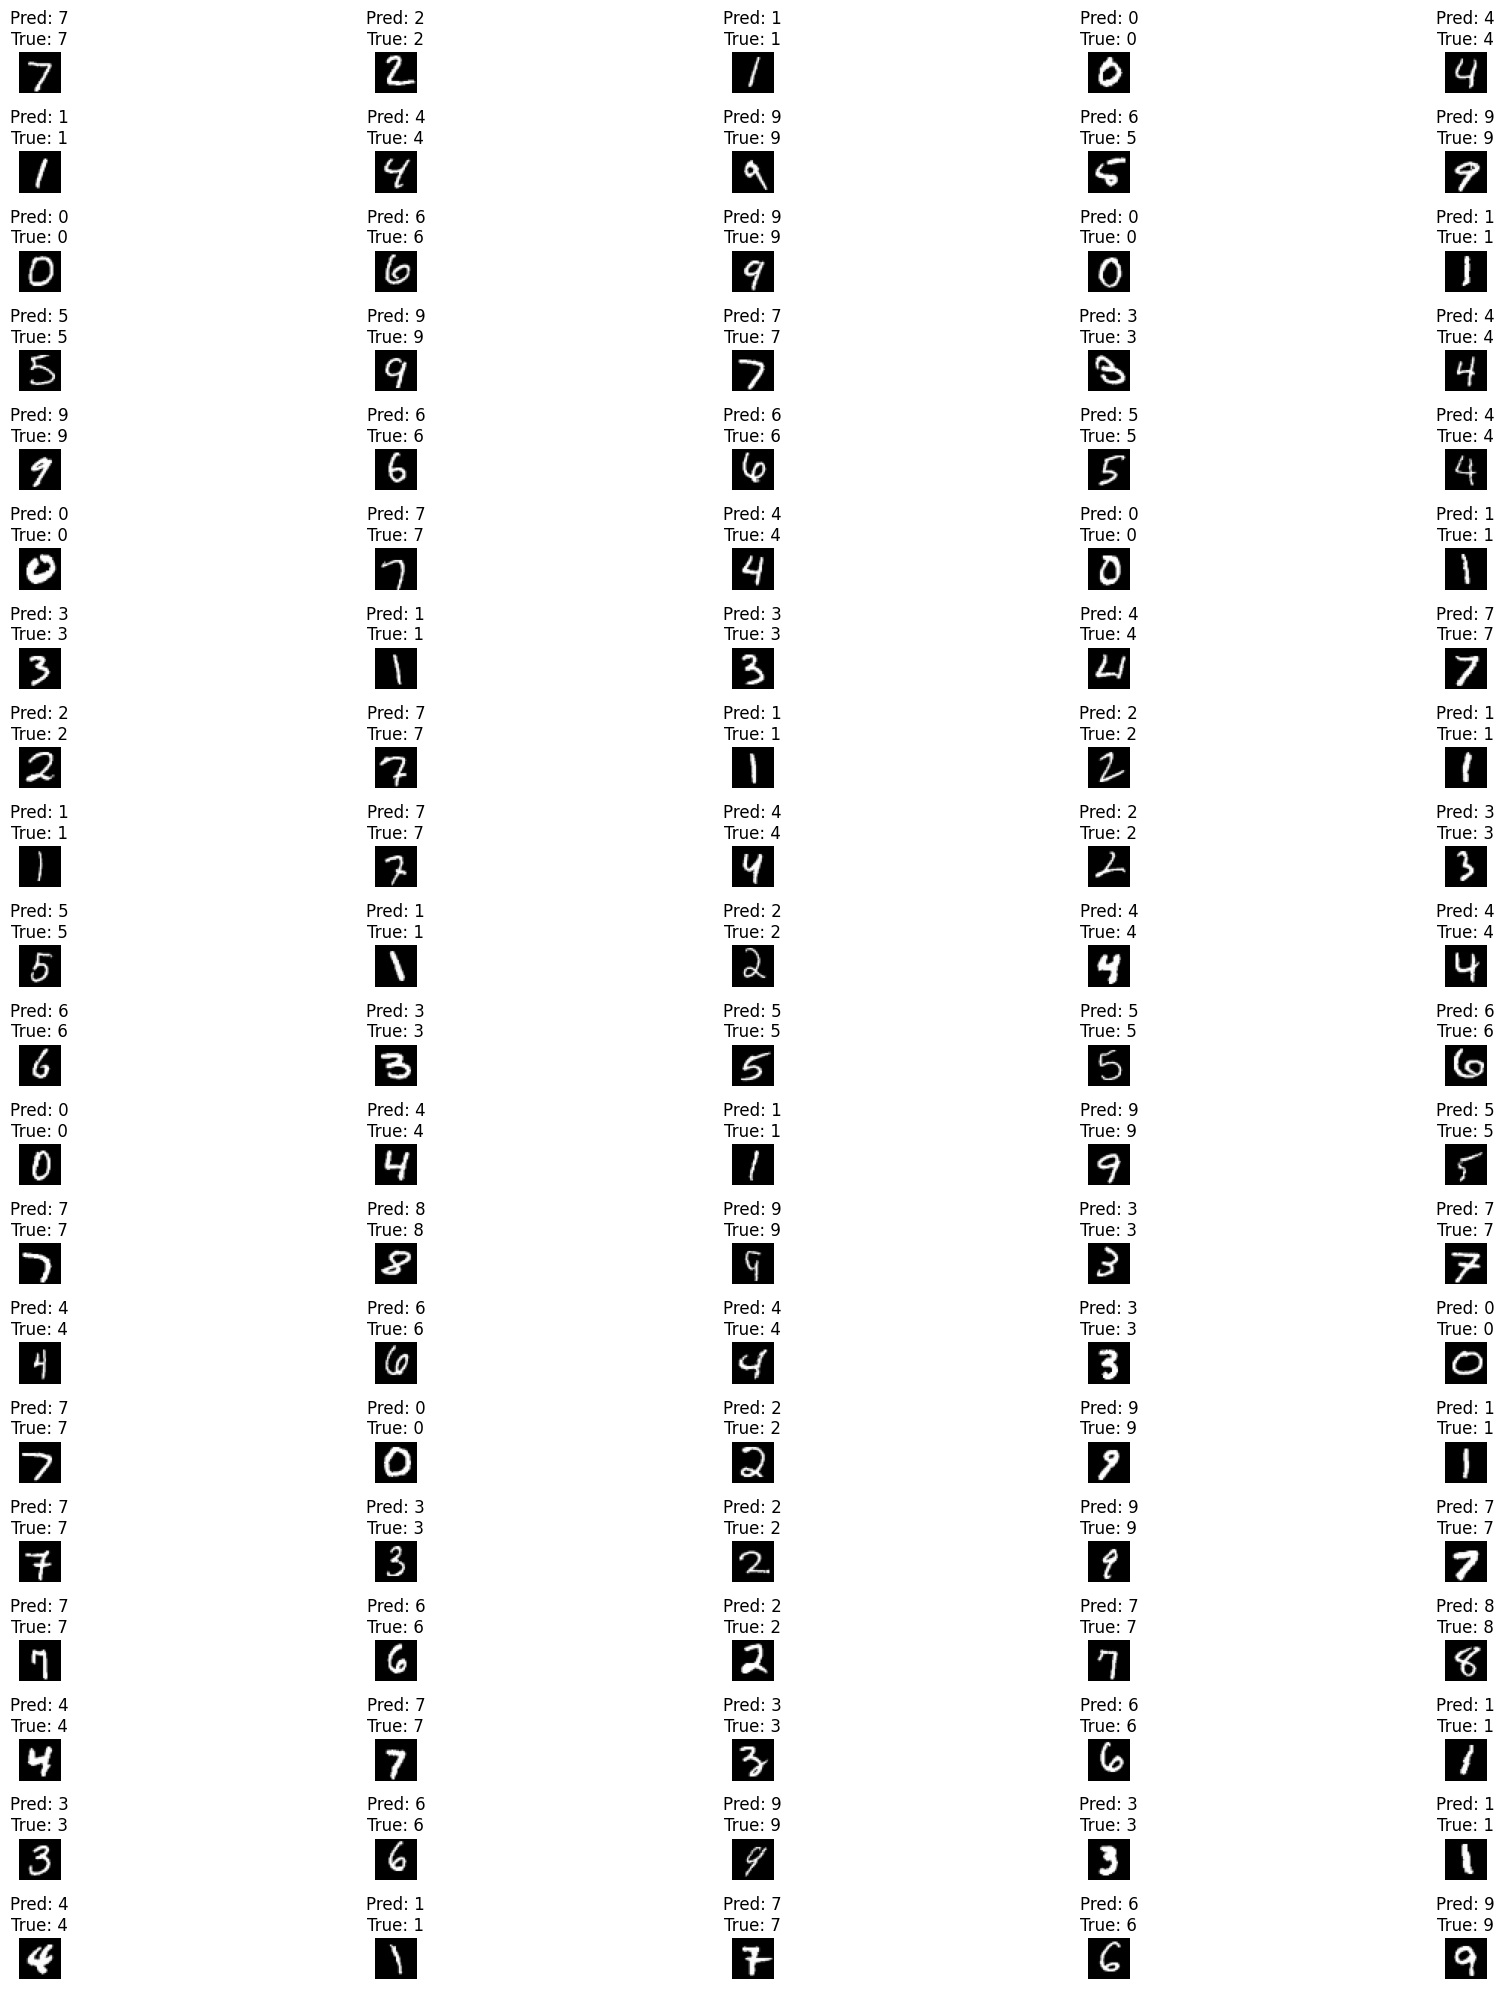

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(20, 5, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {y_test[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig("mnist_pred_50_30_RELU+sigmoid.png", dpi=500)
plt.show()

////Self Test////

In [11]:
from PIL import Image

In [63]:
image_path = "phototest_two.png"  
custom_image = Image.open(image_path).convert('L')
custom_image = custom_image.resize((28, 28))

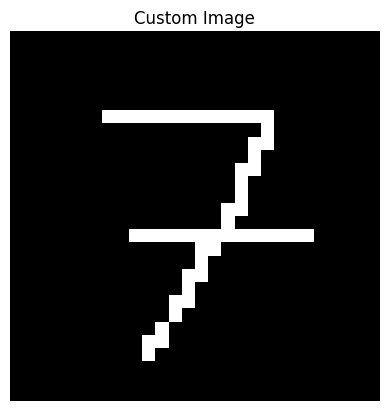

In [64]:
plt.imshow(custom_image, cmap='gray')
plt.title("Custom Image")
plt.axis('off')
plt.show()

In [65]:
custom_image_array = np.array(custom_image).astype('float32') / 255 
custom_image_array = custom_image_array.reshape(1, -1)

In [66]:
custom_prediction = model.predict(custom_image_array)
custom_predicted_label = np.argmax(custom_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step


In [67]:
print(f"Predicted label: {custom_predicted_label}")
print("Prediction probabilities:", custom_prediction)

Predicted label: 36
Prediction probabilities: [[0.01720632 0.01694725 0.01797541 0.0125846  0.01938522 0.02159554
  0.02106857 0.02872268 0.02683686 0.01607188 0.02176675 0.01823526
  0.02042553 0.01957394 0.0180619  0.01955643 0.02611581 0.01799276
  0.01472817 0.02340487 0.0139521  0.02309573 0.02547954 0.02204388
  0.01926564 0.02492095 0.02067988 0.01634794 0.01905425 0.01877994
  0.01980813 0.01451501 0.01857754 0.01515984 0.01835941 0.01732272
  0.03823211 0.02154467 0.02726238 0.0165948  0.01316451 0.02352082
  0.01870807 0.02031604 0.01525267 0.01653109 0.01877421 0.0264916
  0.0208736  0.01711525]]


In [68]:
model.save("mnist_model.keras")
